# Create Software Project - Take Home Midterm Exam/Assignment

* Objective: this jupyter notebook is intended to evaluate how the students understand the Duckietown repo

Prof. Nick Wang, 2016/11/7

## Instructions: 
1. $ cp assignment1.ipynb assignment1-XXXXXXX.ipynb (XXXXXXX is your name) You also need to add your name, setup, and state the contributions in the setup and contributions section.
2. You can already see the desired outputs of each cell, and you need to find the relevant code in the Duckietown repo and reproduce the results.
3. Each student needs to submit one to your mentor, via email. Please do not commit your ipynb to repo. Please do not modify assignment1.ipynb.


## Steup and Conributions:

This work is done by: 0310705 Yu-Shin Wang.

You need to state your contribution here. What's your working environment (e.g., VirtualBox XXX version on Window XX). If you get some help from your TA or classmates, you need to describe here.

working environment : VirtualBox Python 2.7 version.

# Line Detector

### 1.Load the image and resize

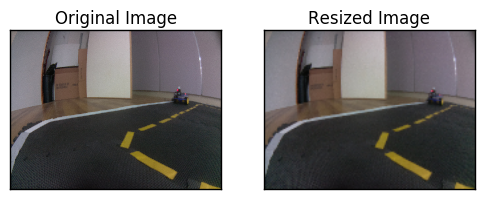

In [58]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


#Use your own image
img = cv2.imread("images/2.jpg")

image_cv = cv2.resize(img, (160, 120),interpolation=cv2.INTER_NEAREST)

dst1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(dst1,cmap = 'brg')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

dst2 = cv2.cvtColor(image_cv,cv2.COLOR_BGR2RGB)
plt.subplot(122),plt.imshow(dst2,cmap = 'brg')
plt.title('Resized Image'), plt.xticks([]), plt.yticks([])

plt.show()


### 2.Find the edge (15%)

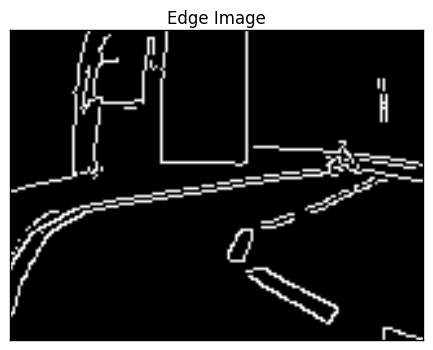

In [59]:

#You should find the config file 'universal.yaml'
#You code this
dilation_kernel_size = 3
canny_thresholds = [80,200]
sobel_threshold = 40.

hough_threshold = 20
hough_min_line_length = 3
hough_max_line_gap = 1

gray = image_cv
edges = cv2.Canny(gray, canny_thresholds[0], canny_thresholds[1], apertureSize = 3)
plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

### 3-1.Setup HSV space threshold (15%)

In [60]:
#You should find the config file 'universal.yaml'


hsv_white1 = np.array([0,0,150])
hsv_white2 = np.array([180,100,255])
hsv_yellow1 = np.array([25,50,50])
hsv_yellow2 = np.array([45,255,255])
hsv_red1 = np.array([0,100,100])
hsv_red2 = np.array([15,255,255])
hsv_red3 = np.array([165,100,100])
hsv_red4 = np.array([180,255,255])




### 3-2.Threshold colors in HSV space (15%)

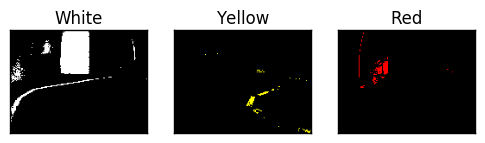

In [61]:
hsv = cv2.cvtColor(image_cv, cv2.COLOR_BGR2HSV)
white = cv2.inRange(hsv, hsv_white1, hsv_white2)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(dilation_kernel_size, dilation_kernel_size))
#white = cv2.bitwise_and(cv2.dilate(white, kernel), edges)

plt.subplot(131),plt.imshow(white,cmap = 'gray')
plt.title('White'), plt.xticks([]), plt.yticks([])

yellow = cv2.inRange(hsv, hsv_yellow1, hsv_yellow2)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(dilation_kernel_size, dilation_kernel_size))
#yellow = cv2.bitwise_and(cv2.dilate(yellow, kernel), edges)

# Uncomment '#' to plot with color
x = cv2.cvtColor(yellow, cv2.COLOR_GRAY2BGR)
x[:,:,2] *= 1
x[:,:,1] *= 1
x[:,:,0] *= 0
x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)

plt.subplot(132),plt.imshow(yellow,cmap = 'gray')
plt.subplot(132),plt.imshow(x,cmap = 'brg')
plt.title('Yellow'), plt.xticks([]), plt.yticks([])

red1 = cv2.inRange(hsv, hsv_red1, hsv_red2)
red2 = cv2.inRange(hsv, hsv_red3, hsv_red4)
red = cv2.bitwise_or(red1, red2)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(dilation_kernel_size, dilation_kernel_size))
#red = cv2.bitwise_and(cv2.dilate(red, kernel), edges)

y = cv2.cvtColor(red, cv2.COLOR_GRAY2BGR)
y[:,:,2] *= 1
y[:,:,1] *= 0
y[:,:,0] *= 0
y = cv2.cvtColor(y, cv2.COLOR_BGR2RGB)

plt.subplot(133),plt.imshow(red,cmap = 'gray')
plt.subplot(133),plt.imshow(y,cmap = 'brg')
plt.title('Red'), plt.xticks([]), plt.yticks([])

plt.show()

### 4.Combine Edge and Colors (15%)

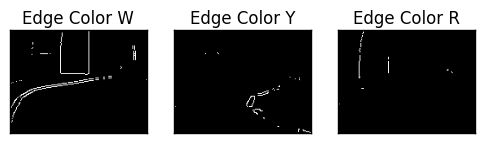

In [62]:
edge_color_white = cv2.bitwise_and(cv2.dilate(white, kernel), edges)
edge_color_yellow = cv2.bitwise_and(cv2.dilate(yellow, kernel), edges)
edge_color_red = cv2.bitwise_and(cv2.dilate(red, kernel), edges)

plt.imshow(edge_color_yellow,cmap = 'gray')
plt.title('Edge Color Y'), plt.xticks([]), plt.yticks([])
plt.subplot(131),plt.imshow(edge_color_white,cmap = 'gray')
plt.title('Edge Color W'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(edge_color_yellow,cmap = 'gray')
#plt.subplot(132),plt.imshow(x,cmap = 'brg')
plt.title('Edge Color Y'), plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(edge_color_red,cmap = 'gray')
#plt.subplot(133),plt.imshow(y,cmap = 'brg')
plt.title('Edge Color R'), plt.xticks([]), plt.yticks([])

plt.show()

### 5-1.Find the lines (15%)

In [63]:
def _lineFilter(bw, edge_color):
        # find gradient of the bw image
        grad_x = -cv2.Sobel(bw/255, cv2.CV_32F, 1, 0, ksize=5)
        grad_y = -cv2.Sobel(bw/255, cv2.CV_32F, 0, 1, ksize=5)
        grad_x *= (edge_color == 255)
        grad_y *= (edge_color == 255)

        # compute gradient and thresholding
        grad = np.sqrt(grad_x**2 + grad_y**2)
        roi = (grad>sobel_threshold)

        #print np.unique(grad)
        #print np.sum(roi)

        # turn into a list of points and normals
        roi_y, roi_x = np.nonzero(roi)
        centers = np.vstack((roi_x, roi_y)).transpose()
        normals = np.vstack((grad_x[roi], grad_y[roi])).transpose()
        normals /= np.sqrt(np.sum(normals**2, axis=1, keepdims=True))

        lines = _synthesizeLines(centers, normals)

        return lines, normals, centers
    
   


In [64]:
 def _synthesizeLines(centers, normals):
        lines = []
        if len(centers)>0:
            x1 = (centers[:,0:1] + normals[:, 1:2] * 6.).astype('int')
            y1 = (centers[:,1:2] - normals[:, 0:1] * 6.).astype('int')
            x2 = (centers[:,0:1] - normals[:, 1:2] * 6.).astype('int')
            y2 = (centers[:,1:2] + normals[:, 0:1] * 6.).astype('int')
            x1 = _checkBounds(x1, image_cv.shape[1])
            y1 = _checkBounds(y1, image_cv.shape[0])
            x2 = _checkBounds(x2, image_cv.shape[1])
            y2 = _checkBounds(y2, image_cv.shape[0])
            lines = np.hstack([x1, y1, x2, y2])
        return lines


In [65]:
def _checkBounds(val, bound):
        val[val<0]=0
        val[val>=bound]=bound-1
        return val

In [66]:
'''
#default threshold 20-> 10
lines_white = ???
lines_yellow = ???
lines_red = ???
'''

bw = white
lines_white = cv2.HoughLinesP(edge_color_white, 1, np.pi/180, 10, np.empty(1), hough_min_line_length, hough_max_line_gap)
color = "white"
lines = lines_white


if lines is not None:
    lines = np.array(lines[0])
    print "found white lines"

else:
    lines = []
    print "no white lines"

bw = red
lines_red = cv2.HoughLinesP(edge_color_red, 1, np.pi/180, 10, np.empty(1), hough_min_line_length, hough_max_line_gap)
color = "red"
lines = lines_red


if lines is not None:
    lines = np.array(lines[0])
    print "found red lines"

else:
    lines = []
    print "no red lines"


bw = yellow
lines_yellow = cv2.HoughLinesP(edge_color_yellow, 1, np.pi/180, 10, np.empty(1), hough_min_line_length, hough_max_line_gap)
color = "yellow"
lines = lines_yellow


if lines is not None:
    lines = np.array(lines[0])
    print "found yellow lines"

else:
    lines = []
    print "no yellow lines"

    



found white lines
found red lines
found yellow lines


### Show the lines (yellow)

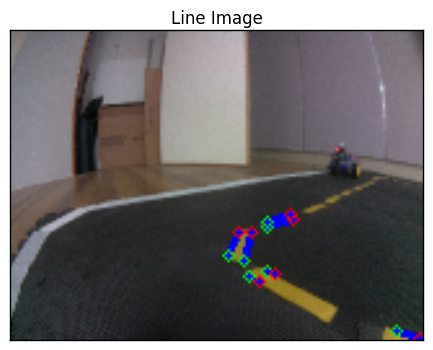

In [67]:
image_with_lines = np.copy(dst2)
if len(lines)>0:
    for x1,y1,x2,y2 in lines:
        cv2.line(image_with_lines, (x1,y1), (x2,y2), (0,0,255), 2)
        cv2.circle(image_with_lines, (x1,y1), 2, (0,255,0))
        cv2.circle(image_with_lines, (x2,y2), 2, (255,0,0))
        
plt.imshow(image_with_lines,cmap = 'brg')
plt.title('Line Image'), plt.xticks([]), plt.yticks([])
plt.show()

### 6-1.Normals (15%)

In [68]:
arr_cutoff = np.array((0, 40, 0, 40))
arr_ratio = np.array((1./160, 1./120, 1./160, 1./120))
        
normals = []
centers = []
if len(lines)>0:
    
    #find the normalized coordinates
    lines_normalized = ((lines + arr_cutoff) * arr_ratio)

    #find the dx dy
    length = np.sum((lines[:, 0:2] -lines[:, 2:4])**2, axis=1, keepdims=True)**0.5
    dx = 1.* (lines[:,3:4]-lines[:,1:2])/length
    dy = 1.* (lines[:,0:1]-lines[:,2:3])/length

    #find the center point
    centers = np.hstack([(lines[:,0:1]+lines[:,2:3])/2, (lines[:,1:2]+lines[:,3:4])/2])


    #find the vectors' direction
    x3 = (centers[:,0:1] - 3.*dx).astype('int')
    x3[x3<0]=0
    x3[x3>=160]=160-1

    y3 = (centers[:,1:2] - 3.*dy).astype('int')
    y3[y3<0]=0
    y3[y3>=120]=120-1

    x4 = (centers[:,0:1] + 3.*dx).astype('int')
    x4[x4<0]=0
    x4[x4>=160]=160-1

    y4 = (centers[:,1:2] + 3.*dy).astype('int')
    y4[y4<0]=0
    y4[y4>=120]=120-1
    
 
    #find the dx dy direction
    flag_signs = (np.logical_and(bw[y3,x3]>0, bw[y4,x4]==0)).astype('int')*2-1
    normals = np.hstack([dx, dy]) * flag_signs

        
    flag = ((lines[:,2]-lines[:,0])*normals[:,1] - (lines[:,3]-lines[:,1])*normals[:,0])>0
    for i in range(len(lines)):
        if flag[i]:
            x1,y1,x2,y2 = lines[i, :]
            lines[i, :] = [x2,y2,x1,y1]

In [69]:
arr_cutoff = np.array((0, 40, 0, 40))
arr_ratio = np.array((1./160, 1./120, 1./160, 1./120))


if len(lines_white)>0:
    
    #find the normalized coordinates
    lines_normalized2 = ((lines_white + arr_cutoff) * arr_ratio)
print lines_normalized2
   

[[[ 0.2         0.90833333  0.5625      0.83333333]
  [ 0.56875     0.75833333  0.56875     0.33333333]
  [ 0.3125      0.86666667  0.44375     0.84166667]
  [ 0.08125     1.          0.1875      0.91666667]
  [ 0.3625      0.675       0.3625      0.525     ]
  [ 0.          1.09166667  0.05625     0.98333333]
  [ 0.01875     1.15833333  0.075       1.01666667]
  [ 0.5         0.825       0.55625     0.81666667]
  [ 0.36875     0.75833333  0.5375      0.75833333]
  [ 0.2125      0.89166667  0.26875     0.875     ]
  [ 0.90625     0.54166667  0.90625     0.625     ]
  [ 0.21875     0.56666667  0.26875     0.56666667]
  [ 0.56875     0.80833333  0.6         0.80833333]
  [ 0.10625     0.95        0.16875     0.9       ]
  [ 0.9         0.525       0.9         0.49166667]
  [ 0.36875     0.48333333  0.36875     0.40833333]
  [ 0.8875      0.49166667  0.8875      0.51666667]
  [ 0.4625      0.83333333  0.4875      0.83333333]
  [ 0.06875     0.975       0.15        0.90833333]
  [ 0.89375 

### 6-2.Draw the Normals 

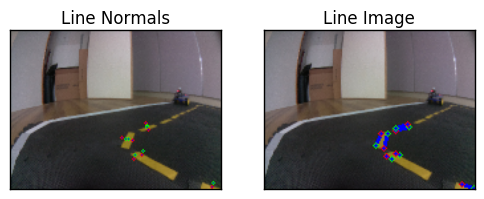

In [70]:
image_with_lines = np.copy(dst2)
if len(centers)>0:
    for x,y,dx,dy in np.hstack((centers,normals)):
        x3 = int(x - 2.*dx)
        y3 = int(y - 2.*dy)
        x4 = int(x + 2.*dx)
        y4 = int(y + 2.*dy)
        cv2.line(image_with_lines, (x3,y3), (x4,y4), (0,0,255), 1)
        cv2.circle(image_with_lines, (x3,y3), 1, (0,255,0))
        cv2.circle(image_with_lines, (x4,y4), 1, (255,0,0))
            
plt.subplot(121),plt.imshow(image_with_lines,cmap = 'brg')
plt.title('Line Normals'), plt.xticks([]), plt.yticks([])

image_with_lines = np.copy(dst2)
if len(lines)>0:
    for x1,y1,x2,y2 in lines:
        cv2.line(image_with_lines, (x1,y1), (x2,y2), (0,0,255), 2)
        cv2.circle(image_with_lines, (x1,y1), 2, (0,255,0))
        cv2.circle(image_with_lines, (x2,y2), 2, (255,0,0))
        
plt.subplot(122),plt.imshow(image_with_lines,cmap = 'brg')
plt.title('Line Image'), plt.xticks([]), plt.yticks([])
plt.show()

### 7-1.setup the segment class

In [71]:
class Vector2D():
    def __init__(self):
        self.x = 0
        self.y = 0  
class Segment():
    def __init__(self):
        self.color = ""
        self.pixels_normalized = np.array([Vector2D(),Vector2D()])
        self.normal = Vector2D()
        

### 7-2.Store in the SegmentList 

In [72]:
segmentMsgList = []

for x1,y1,x2,y2,norm_x,norm_y in np.hstack((lines_normalized,normals)):
    segment = Segment()
    segment.color = color
    segment.pixels_normalized[0].x = x1
    segment.pixels_normalized[0].y = y1
    segment.pixels_normalized[1].x = x2
    segment.pixels_normalized[1].y = y2
    segment.normal.x = norm_x
    segment.normal.y = norm_y

    segmentMsgList.append(segment)  
    
print segmentMsgList[2].pixels_normalized[1].x

0.68125


### 7.3 Print the SegmentList

In [73]:
for i in segmentMsgList:
    print (i.pixels_normalized[0].x,i.pixels_normalized[0].y),(i.pixels_normalized[1].x,i.pixels_normalized[1].y)

(0.57500000000000007, 1.125) (0.60000000000000009, 1.1416666666666666)
(0.93125000000000002, 1.3) (0.98750000000000004, 1.325)
(0.61875000000000002, 0.96666666666666667) (0.68125000000000002, 0.94166666666666665)
(0.61875000000000002, 0.94999999999999996) (0.67500000000000004, 0.92499999999999993)
(0.61875000000000002, 1.1083333333333334) (0.63750000000000007, 1.1166666666666667)
(0.5625, 1.075) (0.58125000000000004, 0.98333333333333328)
(0.52500000000000002, 1.0583333333333333) (0.55000000000000004, 0.98333333333333328)


# Ground Projection 

In [74]:
lines_normalized, normals


print lines_normalized,normals[0]


[[ 0.575       1.125       0.6         1.14166667]
 [ 0.93125     1.3         0.9875      1.325     ]
 [ 0.61875     0.96666667  0.68125     0.94166667]
 [ 0.61875     0.95        0.675       0.925     ]
 [ 0.61875     1.10833333  0.6375      1.11666667]
 [ 0.5625      1.075       0.58125     0.98333333]
 [ 0.525       1.05833333  0.55        0.98333333]] [-0.4472136   0.89442719]


### camera parameters


In [75]:
import cv2
import numpy as np
camera_matrix = np.array([[313.36074836448205, 0.0, 336.0838450835807], 
                          [0.0, 314.54015248663654, 247.7743263737967], 
                          [0., 0., 1.]], dtype=np.float32)
dist_coeffs = np.array([-0.28217371110802897, 0.055546749664386635, 0.001751687666410507, 0.0004238145995972064,0.0], dtype=np.float32)

#Use your own homography & intrinsic camera_matrix and dist_coeffs
homography = np.array([[-9.793363e-05, 3.910776e-05, -0.2322988], 
                       [0.001079716, -4.618199e-05, -0.3600902], 
                       [-0.0007245901, -0.006195595, 1]]
)

matrix = np.array([[316.52597444317314, 0.0, 320.9948809392584], 
                   [0.0, 321.2731572848207, 205.92052874401818],
                   [0.0, 0.0, 1.0]])
pro_matrix = np.array([215.3852996826172, 0.0, 336.87822192765634, 0.0, 0.0, 244.56040954589844, 255.4498474516804, 0.0, 0.0, 0.0, 1.0, 0.0])
coeffs = np.array([-0.2601671987836283, 0.04662981063335094, 0.005020360395041378, 0.0029019828987683857,0.0])

In [76]:
pt_img = np.array([[0.5*640],[0.7*480],[1.]])
print pt_img
G = np.dot(homography,pt_img)
G/=G[2]
print G

pt_img = np.array([[[0.5*640,0.7*480]]])

xy_undistorted = cv2.undistortPoints(pt_img, matrix,coeffs,R=None, P=matrix)
pt_img = np.array([[xy_undistorted[0][0][0]],[xy_undistorted[0][0][1]],[1.]])
print xy_undistorted
print pt_img
G_rect = np.dot(homography,pt_img)
G_rect/=G_rect[2]
print G_rect


[[ 320.]
 [ 336.]
 [   1.]]
[[ 0.19069694]
 [ 0.02291298]
 [ 1.        ]]
[[[ 319.78835382  341.18574134]]]
[[ 319.78835382]
 [ 341.18574134]
 [   1.        ]]
[[ 0.18599918]
 [ 0.0227163 ]
 [ 1.        ]]


### Rectify the image (15%) 

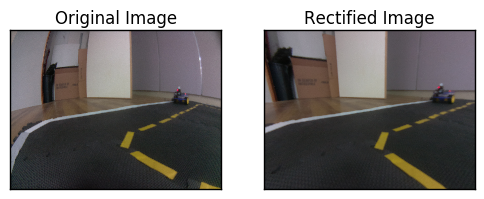

In [77]:
from matplotlib import pyplot as plt
#Use your own image
origin = cv2.imread("images/2.jpg")

'''
#rectfy the image by opencv 'undistort'
rec_img = ???
'''
rec_img = cv2.resize(origin, (640, 480),interpolation=cv2.INTER_NEAREST)
rec_img = cv2.undistort(rec_img,camera_matrix, dist_coeffs)

origin = cv2.cvtColor(origin,cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(origin,cmap = 'brg')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

rec_img = cv2.cvtColor(rec_img,cv2.COLOR_BGR2RGB)
plt.subplot(122),plt.imshow(rec_img,cmap = 'brg')
plt.title('Rectified Image'), plt.xticks([]), plt.yticks([])

plt.show()

# Duckietown Lane Filter

up/down arrow keys to move, enter to edit

Esc to exit edit mode

Shift + enter to run code

1/2/3... to add comment

dd to delete cell

press h for more shortcuts

In [78]:
import numpy as np
from scipy.stats import multivariate_normal, entropy
from scipy.ndimage.filters import gaussian_filter
from math import floor, atan2, pi, cos, sin, sqrt
import time
from matplotlib import pyplot as plt

## Environment Setup

In [79]:
# constant
WHITE = 0
YELLOW = 1
RED = 2

lanewidth = 0.4
linewidth_white = 0.04
linewidth_yellow = 0.02



## Generate Vote (Extra Credit 10% for generating multiple votes from all detected segments)

#### Setup a line segment
* left edge of white lane
* right edge of white lane
* left edge of yellow lane
* right edge of white lane

In [80]:
segmentMsgList2 = []

for x1,y1,x2,y2 in np.hstack(lines_normalized2):
    segment = Segment()
    segment.color = color
    segment.pixels_normalized[0].x = x1
    segment.pixels_normalized[0].y = y1
    segment.pixels_normalized[1].x = x2
    segment.pixels_normalized[1].y = y2


    segmentMsgList2.append(segment)  
    
print segmentMsgList2[2].pixels_normalized[1].x

0.44375


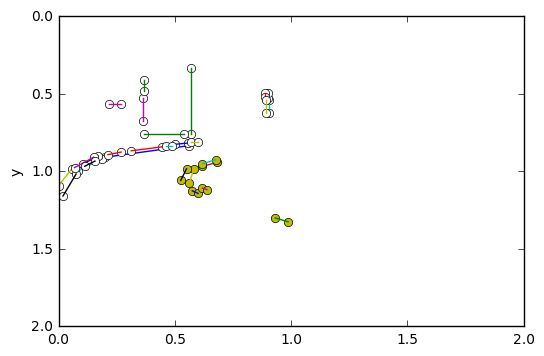

In [91]:

for i in segmentMsgList:
    plt.plot([i.pixels_normalized[0].x,i.pixels_normalized[1].x],[i.pixels_normalized[0].y,i.pixels_normalized[1].y], 'yo')
    plt.plot([i.pixels_normalized[0].x,i.pixels_normalized[1].x],[i.pixels_normalized[0].y,i.pixels_normalized[1].y])
    #print (i.pixels_normalized[0].x,i.pixels_normalized[0].y),(i.pixels_normalized[1].x,i.pixels_normalized[1].y)

for i in segmentMsgList2:
    plt.plot([i.pixels_normalized[0].x,i.pixels_normalized[1].x],[i.pixels_normalized[0].y,i.pixels_normalized[1].y], 'wo')
    plt.plot([i.pixels_normalized[0].x,i.pixels_normalized[1].x],[i.pixels_normalized[0].y,i.pixels_normalized[1].y])
    #print (i.pixels_normalized[0].x,i.pixels_normalized[0].y),(i.pixels_normalized[1].x,i.pixels_normalized[1].y)

# right edge of white lane
#p1 = np.array([0.8, 0.24])
#p2 = np.array([0.4, 0.24])
p1 = np.array([lines_normalized[0][0],lines_normalized[0][1]])
p2 = np.array([lines_normalized[0][2],lines_normalized[0][3]]) 
seg_color = YELLOW

# left edge of white lane
#p1 = np.array([0.4, 0.2])
#p2 = np.array([0.8, 0.2])
#seg_color = WHITE

#plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'ro')
#plt.plot([p1[0], p2[0]], [p1[1], p2[1]])


plt.ylabel('y')
plt.axis([0, 2, 2, 0])
plt.show()

#### compute d_i, phi_i, l_i

In [92]:


t_hat = (p2-p1)/np.linalg.norm(p2-p1)
n_hat = np.array([-t_hat[1],t_hat[0]])
d1 = np.inner(n_hat,p1)
d2 = np.inner(n_hat,p2)
l1 = np.inner(t_hat,p1)
l2 = np.inner(t_hat,p2)

print (d1, d2, l1, l2)

if (l1 < 0):
    l1 = -l1;
if (l2 < 0):
    l2 = -l2;
l_i = (l1+l2)/2
d_i = (d1+d2)/2
phi_i = np.arcsin(t_hat[1])
if seg_color == WHITE: # right lane is white
    if(p1[0] > p2[0]): # right edge of white lane
        d_i = d_i - linewidth_white
        print ('right edge of white lane')
    else: # left edge of white lane
        d_i = - d_i
        phi_i = -phi_i
        print ('left edge of white lane')
    d_i = d_i - lanewidth/2

elif seg_color == YELLOW: # left lane is yellow
    if (p2[0] > p1[0]): # left edge of yellow lane
        d_i = d_i - linewidth_yellow
        phi_i = -phi_i
        print ('left edge of yellow lane')
    else: # right edge of white lane
        d_i = -d_i
        print ('right edge of yellow lane')
    d_i =  lanewidth/2 - d_i

    
print (d_i, phi_i, l_i) 

(0.61710396830056957, 0.61710396830056957, 1.1024666399976417, 1.1325129006265082)
left edge of yellow lane
(-0.39710396830056954, -0.58800260354756562, 1.117489770312075)


### Measurement Likelihood

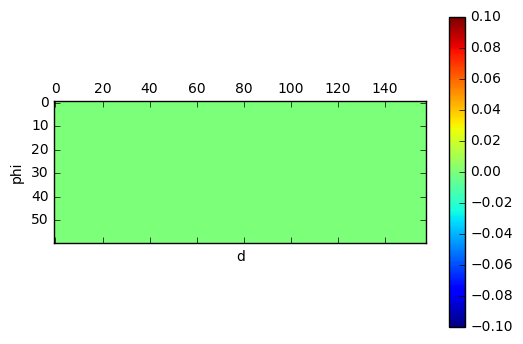

In [93]:
# initialize measurement likelihood

d_min = -0.7
d_max = 0.5
delta_d = 0.02
phi_min = -pi/2
phi_max = pi/2
delta_phi = 0.02
d, phi = np.mgrid[d_min:d_max:delta_d, phi_min:phi_max:delta_phi]

measurement_likelihood = np.zeros(d.shape)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(measurement_likelihood, interpolation='nearest')
fig.colorbar(cax)
plt.ylabel('phi')
plt.xlabel('d')
#ax.set_xticklabels(['']+alpha)
#ax.set_yticklabels(['']+alpha)
plt.show()



/home/robotvision/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


(15.0, 49.0)


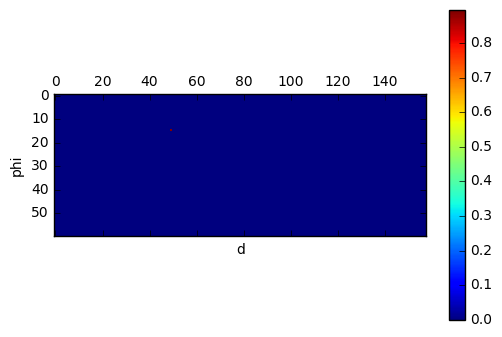

In [94]:
i = floor((d_i - d_min)/delta_d)
j = floor((phi_i - phi_min)/delta_phi)
measurement_likelihood[i,j] = measurement_likelihood[i,j] +  1/(l_i)

print (i, j)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(measurement_likelihood, interpolation='nearest')
fig.colorbar(cax)
plt.ylabel('phi')
plt.xlabel('d')
#ax.set_xticklabels(['']+alpha)
#ax.set_yticklabels(['']+alpha)
plt.show()

## Bayes' Filter (Extra Credit 10% for integrating Bayes' filter for multiple votes)

In [95]:
print d.shape
beliefRV = np.empty(d.shape)
pos = np.empty(d.shape + (2,))
pos[:,:,0]= d
pos[:,:,1]= phi

print pos.shape

(60, 158)
(60, 158, 2)


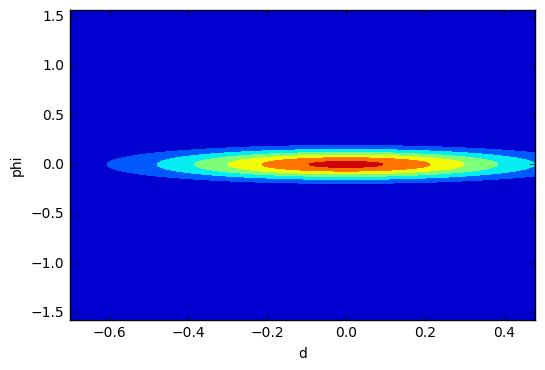

In [101]:
mean_0 = [0, 0]
cov_0 = [[0.1, 0], [0, 0.01]]

RV = multivariate_normal(mean_0, cov_0)
beliefRV=RV.pdf(pos)

plt.ylabel('phi')
plt.xlabel('d')
plt.contourf(d, phi, beliefRV)
plt.show()

In [104]:
maxids = np.unravel_index(beliefRV.argmax(),beliefRV.shape)
print maxids
lanePose_d = d_min + maxids[0] * delta_d
lanePose_phi = phi_min + maxids[1] * delta_phi

print lanePose_d
print lanePose_phi

(35, 79)
1.11022302463e-16
0.0092036732051


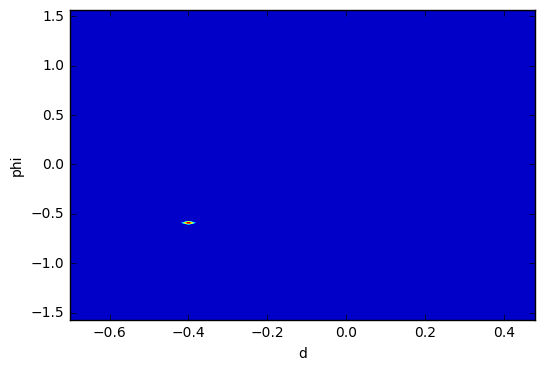

In [105]:
beliefRV=np.multiply(beliefRV+1,measurement_likelihood+1)-1
beliefRV=beliefRV/np.sum(beliefRV)

plt.ylabel('phi')
plt.xlabel('d')
plt.contourf(d, phi, beliefRV)
plt.show()